In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('../Style.mplstyle')
import matplotlib as mpl
import pandas as pd
import os
import sys
import scipy
import matplotlib.dates as mdates
from datetime import datetime
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from itertools import cycle, islice
sys.path.append('..')
from plot_functions import *
from calculations import *
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = {
    'Na': [0.502441894, 0.608883359, 0.442525619, 0.895830217, 0.885309128, 1.682221745, 1.494529365, 1.524118949, 0.577338162, 0.70518581, 0.256129365, 2.918791723, 2.964061746, 0.985197356],
    'Mg': [0.190069835, 0.188242699, 0.165227766, 0.264869583, 0.24291032, 0.425298474, 0.191784781, 0.228491129, 0.184643127, 0.17605871, 0.110159443, 0.561807267, 0.597626727, 0.320966624],
    'Al': [0.28513412, 0.354357766, 0.451486084, 0.698084838, 0.505667657, 1.017903495, 0.336607275, 0.405317327, 0.325632738, 0.26330836, 0.1459949, 0.666133982, 0.484194143, 0.448843462],
    'K': [0.35184565, 0.369649449, 0.401273507, 0.487531659, 0.400484259, 0.658281239, 0.344276999, 0.301595962, 0.256043325, 0.243225636, 0.190907871, 0.414745818, 0.353320597, 0.301555075],
    'Ca': [1.668631527, 1.428037729, 1.578794473, 2.240093952, 1.652548325, 2.899256791, 1.557285187, 1.416690612, 1.295887802, 1.353828842, 0.990379976, 2.336978428, 2.252377612, 1.729829642],
    'Ti': [0.028313819, 0.03307143, 0.044342893, 0.05313157, 0.046019176, 0.079382368, 0.03055687, 0.031800708, 0.023698832, 0.019157177, 0.013782073, 0.027363349, 0.020315989, 0.018131962],
    'V': [0.0004, 0.0005, 0.0007, 0.0012, 0.0010, 0.0019, 0.0007, 0.0013, 0.0010, 0.0013, 0.0023, 0.0019, 0.0019, 0.0015],
    'Cr': [1.1408, 0.8974, 1.4125, 1.3367, 1.3746, 1.4599, 1.5042, 1.3967, 1.5042, 1.1186, 0.1131, 0.1320, 0.1193, 0.1101],
    'Mn': [0.0109, 0.0127, 0.0228, 0.0209, 0.0245, 0.0283, 0.0137, 0.0448, 0.0186, 0.0272, 0.1788, 0.1388, 0.2071, 0.1297],
    'Fe': [0.2622, 0.3562, 0.7921, 0.8696, 1.1068, 1.4002, 0.6650, 2.8679, 1.1610, 2.0718, 18.0231, 15.0591, 21.3547, 14.2850],
    'Co': [0.0002, 0.0002, 0.0002, 0.0003, 0.0003, 0.0004, 0.0002, 0.0004, 0.0002, 0.0003, 0.0016, 0.0013, 0.0179, 0.0012],
    'Ni': [0.0031, 0.0036, 0.0042, 0.0032, 0.0042, 0.0033, 0.0030, 0.0063, 0.0036, 0.0055, 0.0185, 0.0183, 0.0209, 0.0177],
    'Cu': [0.0198, 0.0207, 0.0368, 0.0321, 0.0601, 0.0449, 0.0401, 0.1534, 0.0878, 0.1596, 1.4785, 1.2195, 1.5157, 1.1470],
    'Zn': [0.0329, 0.0391, 0.0495, 0.0475, 0.0703, 0.0608, 0.0651, 0.1362, 0.0652, 0.0857, 0.3085, 0.4696, 0.2721, 0.3806],
    'Ga': [0.0002, 0.0002, 0.0003, 0.0003, 0.0005, 0.0006, 0.0003, 0.0009, 0.0005, 0.0008, 0.0029, 0.0046, 0.0024, 0.0038],
    'As': [0.00001, -0.00006, 0.00019, 0.00014, 0.00041, 0.00029, 0.00069, 0.00172, 0.00025, 0.00041, 0.00138, 0.00123, -0.00016, 0.00117],
    'Se': [0.00017, 0.00019, 0.00015, 0.00018, 0.00018, 0.00022, 0.00022, 0.00040, 0.00025, 0.00035, 0.00020, 0.00022, 0.00014, 0.00016],
    'Rb': [0.00065, 0.00083, 0.00086, 0.00128, 0.00086, 0.00166, 0.00068, 0.00077, 0.00053, 0.00047, 0.00094, 0.00065, 0.00057, 0.00038],
    'Sr': [0.01147, 0.00684, 0.00722, 0.01187, 0.00752, 0.01291, 0.01028, 0.00645, 0.00657, 0.00705, 0.01259, 0.01381, 0.00928, 0.00842],
    'Mo': [0.00054, 0.00061, 0.00062, 0.00074, 0.00129, 0.00120, 0.00072, 0.00783, 0.00158, 0.00218, 0.00926, 0.00911, 0.01195, 0.00780],
    'Cd': [0.00008, 0.00007, 0.00008, 0.00022, 0.00008, 0.00015, 0.00017, 0.00037, 0.00006, 0.00006, 0.00028, 0.00013, 0.00029, 0.02107],
    'Sb': [0.00076, 0.00097, 0.00472, 0.00324, 0.00830, 0.00694, 0.00580, 0.02645, 0.01246, 0.02436, 0.09086, 0.15135, 0.08120, 0.12933],
    'Ba': [0.00662, 0.00735, 0.01279, 0.01446, 0.01936, 0.02317, 0.01158, 0.04080, 0.02187, 0.03440, 0.12869, 0.20097, 0.10344, 0.16648]
}

days = [
    "Building", "Traffic", "Building", "Traffic",
    "Building", "Traffic", "Building", "Platform A",
    "Building", "Platform A",
    "Platform C", "Platform B", "Platform C", "Platform B"
]

# Fast farve-mapping til hvert element
element_colors = {
    'Na': 'gold', 'Mg': 'lightblue', 'Al': 'tab:green', 'K': 'tab:red', 'Ca': 'tab:purple',
    'Cr': 'orange', 'Mn': 'darkblue', 'Fe': 'tab:blue',
    'Co': 'darkorange', 'Ni': 'sienna', 'Cu': '#e78ac3', 'Zn': '#a6d854', 'Ga': '#ffd92f',
    'Zr': '#e5c494', 'Se': '#b3b3b3', 'Ti': '#c44e52', 'Sr': '#ccebc5', 'Mo': '#ffed6f',
    'Sn': 'plum', 'Sb': 'darkgrey', 'Ba': '#8dd3c7', 'Other': 'lightgray'
}

df = pd.DataFrame(data)
df["Day"] = days
df_grouped = df.groupby("Day").mean()
df_grouped = df_grouped.div(df_grouped.sum(axis=1) / 100, axis=0)

df_grouped['Other'] = np.zeros(5)

for day, row in df_grouped.iterrows():
    Other_sum = 0
    for element, conc in row.items():
        if conc < 1:
            Other_sum += conc
            df_grouped.loc[day, element] = 0
    df_grouped.loc[day, 'Other'] = Other_sum

df_grouped = df_grouped.iloc[:,df_grouped.sum(axis=0).to_numpy() >= 1]

colors = [element_colors[element] for element in df_grouped.keys()]
my_colors = list(islice(cycle(colors), None, len(df_grouped)))

df_grouped = df_grouped.reindex(['Building', 'Traffic', 'Platform A', 'Platform B', 'Platform C'])

display(df_grouped)

,Na,Mg,Al,K,Ca,Cr,Fe,Cu,Zn,Other
Day,,,,,,,,,,
Building,13.844141,3.457841,6.756939,6.222622,27.506842,24.608807,14.145549,0.000000,1.004036,2.453223
Traffic,15.088014,4.158689,9.801708,7.174704,31.092206,17.488627,12.432359,0.000000,0.000000,2.763692
Platform A,14.960221,2.714817,4.486954,3.656141,18.592157,16.879453,33.148902,2.100453,1.489107,1.971794
Platform B,8.760346,1.980898,2.501951,1.607342,9.125703,0.000000,65.846617,5.310301,1.907804,2.959038
Platform C,6.137267,1.348949,1.201059,1.037229,6.180276,0.000000,75.048990,5.706558,1.106548,2.233124


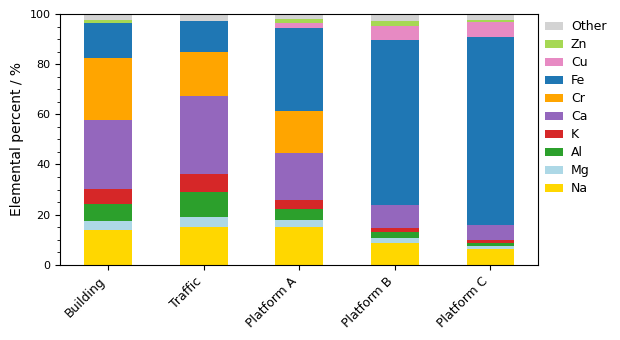

In [3]:
ax = df_grouped.plot(kind="bar", stacked=True, figsize=(6.3, 3.5), color=colors)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor = (1, 1, 0, 0), fontsize = 9)
ax.set(ylim = (0, 100), ylabel = 'Elemental percent / %', xlabel=None)
ax.xaxis.set_tick_params(which='minor',bottom=False)
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 9, rotation=45, ha="right")

plt.tight_layout()
plt.savefig('Field_ICP-MS.pdf', dpi = 600)

In [4]:
# Data
data = {
    'Element': ['Mg', 'Al', 'Ca', 'Ti', 'Cr', 'Fe', 'Mn', 'Cu', 'Zn', 'Zr', 'Sn', 'Ba'],
    'LM/mild':  [7.0, 2.6, 0.34, 0.13, 1.41, 110, 0.86, 0.34, 11.1, 0.04, 8.2, 0.07],
    'LM/harsh': [16.8, 7.2, 1.33, 0.36, 2.89, 225, 1.76, 1.17, 24.3, 0.17, 20.0, 0.20],
    'NAO/mild': [1.6, 0.2, 0.13, 1.60, 0.0, 15, 0.11, 0.05, 0.0, 1.58, 1.2, 0.85],
    'NAO/harsh':[8.9, 0.6, 1.05, 11.57, 0.04, 51, 0.42, 0.17, 0.0, 13.03, 7.4, 5.05]
}
df = pd.DataFrame(data)
df.set_index('Element', inplace=True)
df = df.T

df = df.div(df.sum(axis=1) / 100, axis=0)

df['Other'] = np.zeros(4)

for exp, row in df.iterrows():
    Other_sum = 0
    for element, conc in row.items():
        if conc < 1:
            Other_sum += conc
            df.loc[exp, element] = 0
    df.loc[exp, 'Other'] = Other_sum

df = df.iloc[:,df.sum(axis=0).to_numpy() >= 1]

colors = [element_colors[element] for element in df.keys()]

display(df)

Element,Mg,Al,Ca,Ti,Fe,Zn,Zr,Sn,Ba,Other
LM/mild,4.926455,1.829826,0.000000,0.000000,77.415722,7.811950,0.000000,5.770990,0.000000,2.245056
LM/harsh,5.578060,2.390597,0.000000,0.000000,74.706156,8.068265,0.000000,6.640547,0.000000,2.616376
NAO/mild,7.168459,0.000000,0.000000,7.168459,67.204301,0.000000,7.078853,5.376344,3.808244,2.195341
NAO/harsh,8.969062,0.000000,1.058148,11.659780,51.395747,0.000000,13.131110,7.457422,5.089187,1.239544


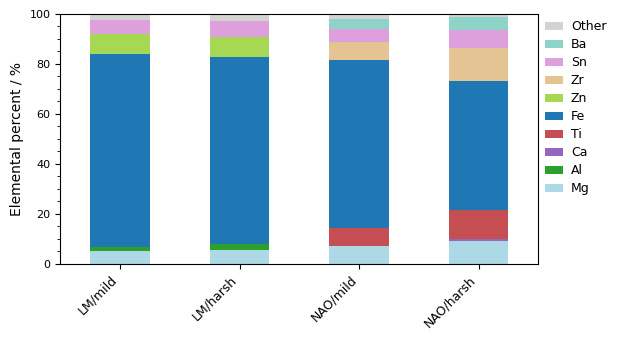

In [5]:
ax = df.plot(kind="bar", stacked=True, figsize=(6.3, 3.5), color=colors)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor = (1, 1, 0, 0), fontsize = 9)
ax.set(ylim = (0, 100), ylabel = 'Elemental percent / %', xlabel=None)
ax.xaxis.set_tick_params(which='minor',bottom=False)
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 9, rotation=45, ha="right")

plt.tight_layout()
plt.savefig('BWP_ICP-MS.pdf', dpi = 600)